In [1]:
# %% loading keras LSTM and other libs
from keras.models import Sequential
from keras.layers import Dense, LSTM, RNN
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2023-04-28 12:33:20.674849: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 12:33:20.710345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 12:33:21.215552: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2023-04-28 12:33:22.080055: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-28 12:33:22.096389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-28 12:33:22.096520: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
# Example list of documents
documents = [
    'Emotional Rescue is the 15th British and 17th American studio album by English rock band the Rolling Stones, released on 20 June 1980 by Rolling Stones Records. Following the success of their previous album, Some Girls, their biggest hit to date, the Rolling Stones returned to the studio in early 1979 to start writing and recording its follow-up. Full-time members Mick Jagger (vocals), Keith Richards (guitar), Ronnie Wood (guitar), Bill Wyman (bass) and Charlie Watts (drums) were joined by frequent collaborators Ian Stewart (keyboards), Nicky Hopkins (keyboards), Bobby Keys (saxophone) and Sugar Blue (harmonica).Upon release, the album topped the charts in at least six countries, including the United States, UK, and Canada. Hit singles from it include the title track, which reached No. 1 in Canada, No. 3 in the United States, and No. 9 in the UK and a top-40 single in several countries. The recording sessions for Emotional Rescue were so productive that several tracks left off the album would form the core of the follow-up, 1981s Tattoo You.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
# Initialize a TfidfVectorizer object with custom options
vectorizer = TfidfVectorizer(max_features=50000)
tfidf_matrix = vectorizer.fit_transform(documents)
text = ['core','form']
text_transform = vectorizer.transform(text)
print(text_transform.toarray()[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [25]:
def NL_training_segmentation(data):
    data = vectorizer.transform(data.split(' ')).toarray()
    X = []
    y = []
    for i in range(0,len(data)-1):
        X.append([data[i]])
        y.append(data[i+1])
    return np.array(X),np.array(y)
def Basic_segemntation(data):
    data = vectorizer.transform(data.split(' ')).toarray()
    X = []
    for i in range(0,len(data)):
        X.append([data[i]])
    return np.array(X)

In [4]:
X_train , y_train = NL_training_segmentation(documents[0])
X_test , y_test = NL_training_segmentation(documents[0])
# X_train , y_train , X_test , y_test = np.array(X_train) , np.array(y_train) , np.array(X_test) , np.array(y_test)


print(X_train.shape)

(170, 1, 122)


In [5]:
# Creating the neural network model
model = Sequential()

# Adding the layers to the model
model.add(LSTM(256, input_shape=(1,122))) # LSTM layer with 8 neurons, input shape of (1, 4)
# model.add(Dense(32, activation='relu')) # Hidden layer with neurons
# model.add(Dense(32, activation='relu')) # Hidden layer with neurons
model.add(Dense(122, activation='sigmoid')) # Output layer with 1 neuron

linear_loss ='mean_squared_error'
sigmoid_loss = 'binary_crossentropy'

# Compiling the model
model.compile(loss=sigmoid_loss, optimizer='RMSprop', metrics=['accuracy'])

2023-04-28 12:33:34.811305: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-28 12:33:34.811493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-28 12:33:34.811575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6529
Epoch 2/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6765
Epoch 3/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6647
Epoch 4/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6529
Epoch 5/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6471
Epoch 6/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6647
Epoch 7/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6353
Epoch 8/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6529
Epoch 9/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6647
Epoch 10/2000
17/17 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.6529

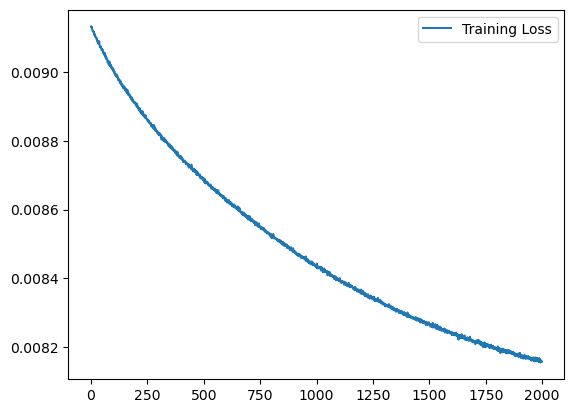

In [9]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=10)
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

In [12]:
score = model.evaluate(X_test, y_test, batch_size=1)
print("Accuracy: %.2f%%" % (score[1]*100))

170/170 [==============================] - 0s 918us/step - loss: 0.0081 - accuracy: 0.7000
Accuracy: 70.00%


In [59]:
vocabulary = vectorizer.get_feature_names_out()
prompt = 'Emotional rescue'
for i in range(0,15):
    promptx = Basic_segemntation(prompt)
    y_pred = model.predict(np.array([promptx[i+1]]))
    word = vocabulary[np.where(y_pred == y_pred.max())[1][0]]
    prompt += " "+word
print(prompt)



1/1 [==============================] - 0s 13ms/step
Emotional rescue were so productive that several countries the album by frequent collaborators ian stewart keyboards nicky


[array(['15th'], dtype='<U13'), array(['15th'], dtype='<U13')]
